In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_wine 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
data = load_wine() 
X = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
X.head()
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Dimensions de X : (178, 13)


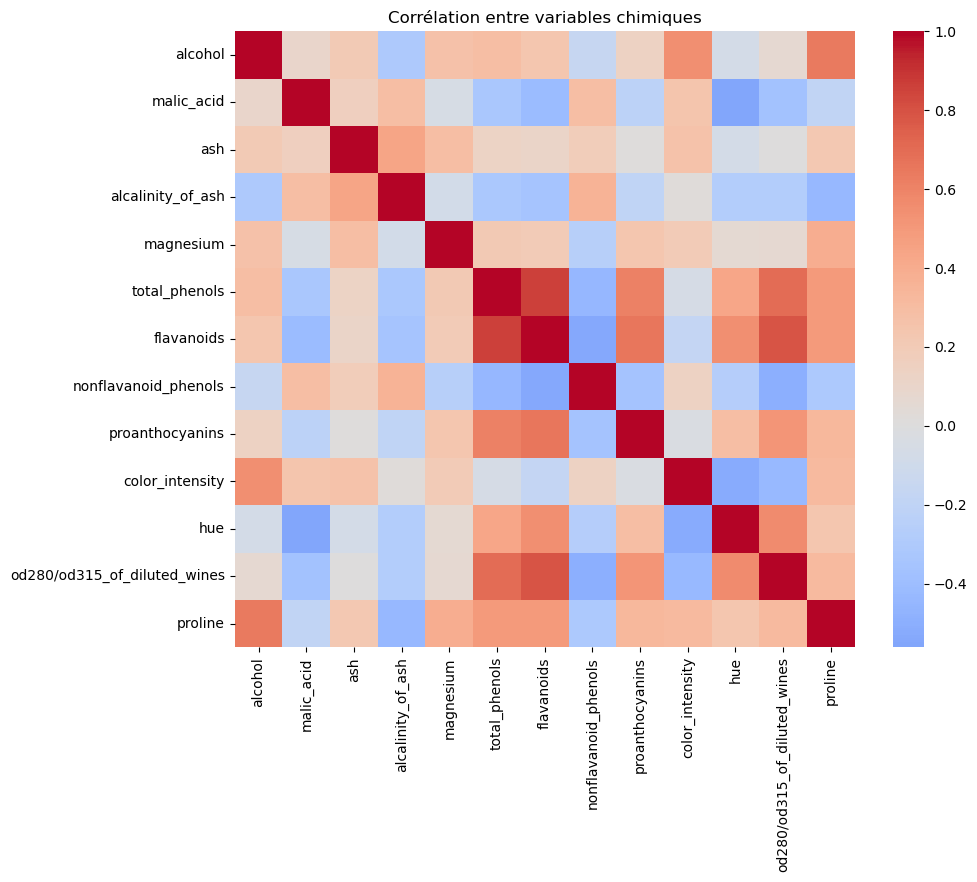

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Dimensions de X :", X.shape)
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Corrélation entre variables chimiques")
plt.show()

C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

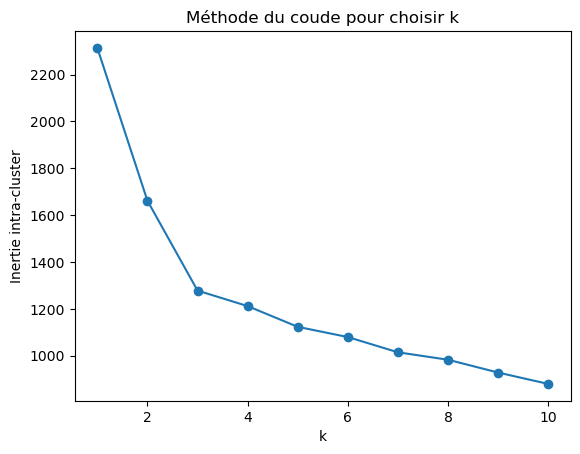

In [12]:
inerties = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inerties.append(km.inertia_)

plt.plot(range(1, 11), inerties, marker='o')
plt.xlabel('k')
plt.ylabel('Inertie intra-cluster')
plt.title('Méthode du coude pour choisir k')
plt.show()


C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

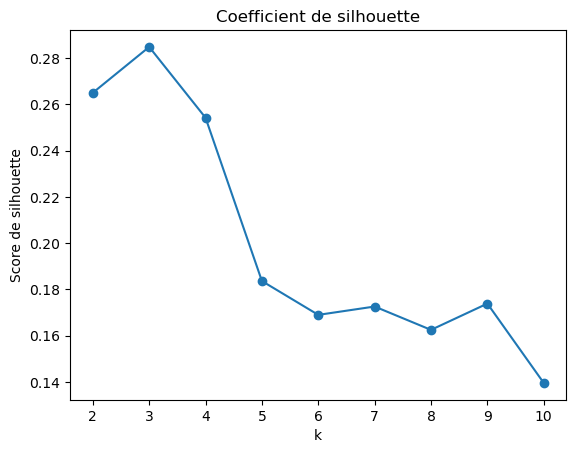

In [13]:
# la coude apparait vers k=3
silhouettes = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 11), silhouettes, marker='o')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Coefficient de silhouette')
plt.show()


In [ ]:
#max score silhouette k =3 

C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


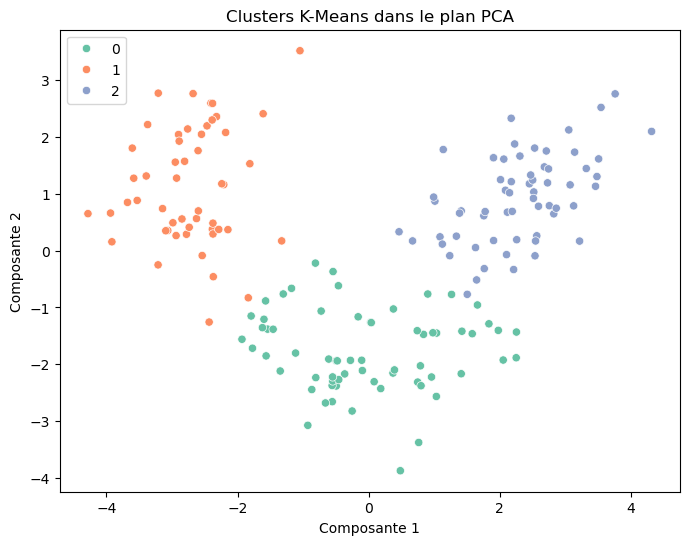

In [15]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)
X["Cluster_KMeans"] = labels_km
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_km, palette="Set2")
plt.title("Clusters K-Means dans le plan PCA")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()


In [ ]:
#La projection PCA sur 2 dimensions montre clairement 3 groupes distincts
#ce qui confirme la pertinence de k = 3


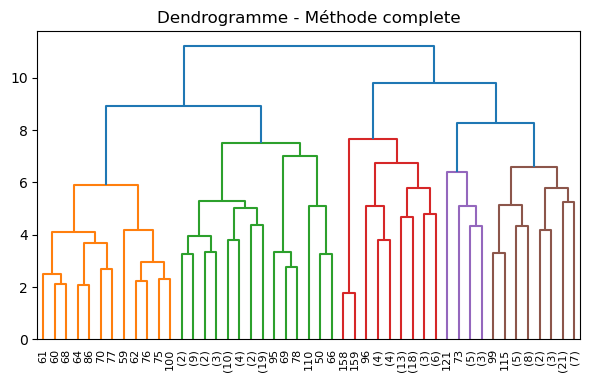

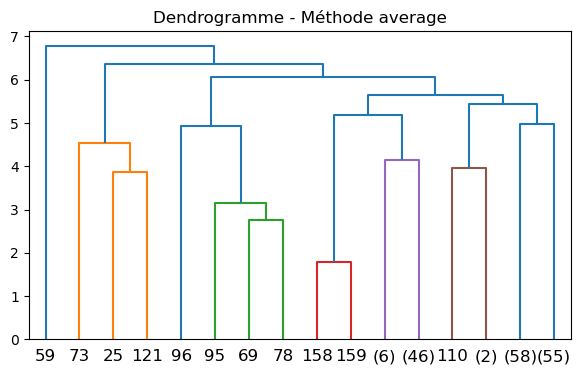

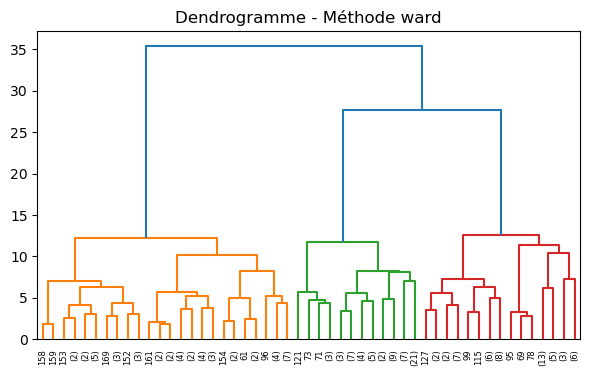

In [16]:
methods = ["complete", "average", "ward"]

for m in methods:
    plt.figure(figsize=(7,4))
    Z = linkage(X_scaled, method=m)
    dendrogram(Z, truncate_mode="level", p=5)
    plt.title(f"Dendrogramme - Méthode {m}")
    plt.show()


In [18]:
Z = linkage(X_scaled, method="ward")
clusters_cah = fcluster(Z, t=3, criterion="maxclust")
X["Cluster_CAH"] = clusters_cah
pd.crosstab(X["Cluster_KMeans"], X["Cluster_CAH"])


Cluster_CAH,1,2,3
Cluster_KMeans,,,
0,5,3,57
1,51,0,0
2,0,61,1


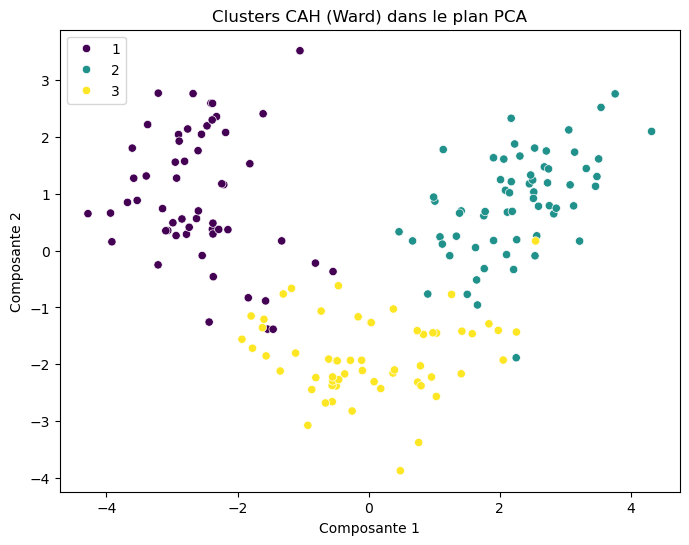

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_cah, palette="viridis")
plt.title("Clusters CAH (Ward) dans le plan PCA")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()


La méthode K-Means appliquée aux données originales permet d’obtenir trois clusters avec une séparation correcte mais moins nette qu’après réduction de dimension. 
Avec K-Means sur les composantes principales (PCA), on observe également trois clusters mais cette fois la séparation visuelle est bien meilleure 

La méthode CAH (Ward) sur les données originales produit aussi trois clusters et met en évidence une structure cohérente mais moins facile à représenter visuellement.
la CAH (Ward) appliquée aux données PCA donne également trois clusters, avec une bonne séparation bien que légèrement moins nette que celle obtenue par K-Means sur PCA tout en conservant des clusters bien structurés.